

**`Challenge 5 `**


Alumno: Daniel Ivan Zavaleta Guzmán

1. Emplea modelos no supervisados (Kmeans, DBSCAN, PCA, etc) y figuras (elbow plot, diagrama de silhouette) según convenga.

2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?

3. ¿Cómo usarías KMeans para reducir la dimensionalidad?

#Análisis exploratorio de datos

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/UML_2024.csv")
df

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,8.6718,30,6,0,0,0,0,0,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,51136451,356.373991,5.9132,26,6,2,2,0,0,0,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,46946664,410.465990,8.5972,32,6,1,1,0,0,0,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,46898924,425.412990,6.8134,28,8,1,2,1,0,0,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


Verificando los métodos info() y describe() en los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,300.0,3.601528e+07,4.067521e+07,1046.000000,5.281500e+06,1.388871e+07,6.880700e+07,1.560257e+08
Molecular_weight,300.0,3.348073e+02,1.429548e+02,122.115432,1.858750e+02,3.523860e+02,4.567110e+02,9.176300e+02
LogP,300.0,7.927830e+00,6.127177e+00,-1.765100,2.399200e+00,6.627100e+00,1.357108e+01,4.037570e+01
Number_of_HBA_1,300.0,3.013333e+01,1.827280e+01,7.000000,1.300000e+01,2.700000e+01,4.800000e+01,1.180000e+02
Number_of_HBA_2,300.0,4.460000e+00,1.224772e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,300.0,1.433333e+00,8.648983e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,300.0,1.493333e+00,1.169551e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,300.0,3.233333e-01,5.225250e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,300.0,5.533333e-01,9.255689e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,300.0,4.333333e-02,2.858811e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [ ]:
df_features=df.drop('cid', axis=1)

Para detectar redunacia entre features, se usa matriz de correlacion.

<Axes: >

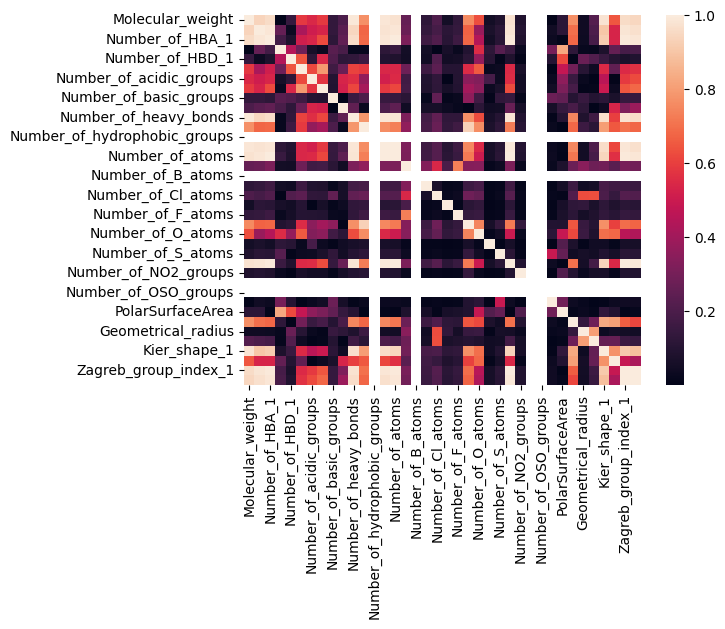

In [ ]:
plt.figure()
sns.heatmap(df_features.corr().abs())

Se extraen los features con correlacion mayor a 0.95 para no tener redundancia.

In [ ]:
corr_mat = df_features.corr()
columns = np.full((corr_mat.shape[0], ), True, dtype=bool)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False
selected_columns = df_features.columns[columns]
df_features_filtered = df_features[selected_columns]
df_features_filtered

,Molecular_weight,LogP,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,Number_of_heterocycles,...,Number_of_S_atoms,Number_of_NO2_groups,Number_of_SO_groups,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_2
0,123.114998,1.0732,4,1,0,0,0,0,0.111111,1,...,0,0,0,0,0,68.87,7.031056,1.007808,5.976582,3.239669
1,165.155998,1.5166,6,2,0,0,0,2,0.166667,1,...,0,0,0,0,0,107.25,9.169663,1.003795,8.134998,4.888889
2,265.053997,-1.7651,3,1,0,1,0,0,0.100000,1,...,0,0,0,0,0,59.86,7.029373,0.161433,42.543630,4.792899
3,138.149998,1.2309,3,1,0,0,0,0,0.100000,1,...,0,0,0,0,0,59.86,7.067147,1.006808,6.019361,3.408284
4,157.559997,1.6036,4,1,0,0,0,0,0.100000,1,...,0,0,0,0,0,68.87,7.646398,1.007958,6.586025,3.408284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,396.438991,8.6718,6,0,0,0,0,0,0.333333,0,...,0,0,0,0,0,71.06,16.429361,1.082601,14.175829,13.420118
296,356.373991,5.9132,6,2,2,0,0,0,0.222222,0,...,0,0,0,0,0,93.06,11.376300,0.969437,10.734955,9.972299
297,410.465990,8.5972,6,1,1,0,0,0,0.354839,0,...,0,0,0,0,0,82.06,16.457952,0.969098,15.982759,14.210000
298,425.412990,6.8134,8,1,2,1,0,0,0.343750,0,...,0,0,0,0,0,122.19,15.917241,0.970202,15.406104,14.302721


Se redujo de 38 columnas a 30 columnas de features.

#Empleo de modelos no supervisados y figuras relevantes

Primero se nomralizan los datos debido a la variedad en las escalas de las características, lo que es importante para métodos basados en distancia como K-Means.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features_filtered)

Se tratan de eliminar los Valores NaN.

In [ ]:
from sklearn.impute import SimpleImputer

# Crear el imputador, que reemplazará cada NaN por la media de su columna
imputer = SimpleImputer(strategy='mean')

df_filled = imputer.fit_transform(df_scaled)

**Se aplica elbow plot**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

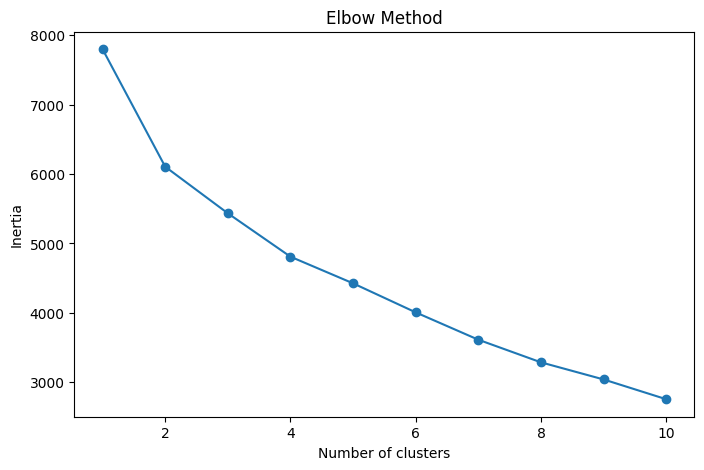

In [ ]:
#Elbow plot
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

4 clusters parece la posicion optima a partir del elbow.

**Uso de Sillouete plot**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

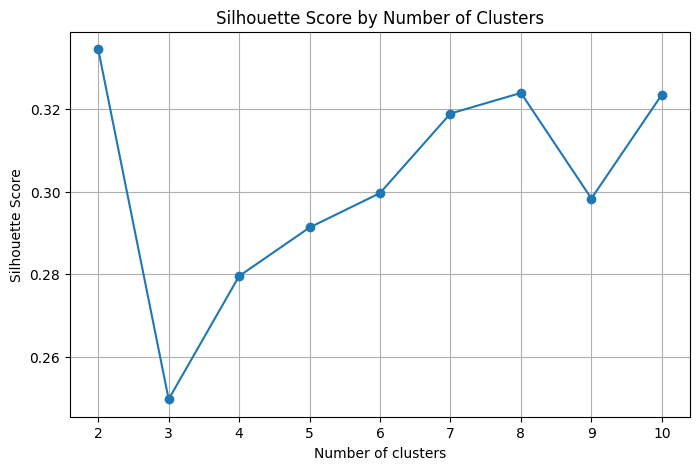

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

silhouette_scores = []
ks = range(2, 11)  # silhouette_score no se puede calcular con un solo cluster

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_filled)
    score = silhouette_score(df_filled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.grid(True)
plt.show()

Se observa del grafico que 9 clusters tiene el valor más alto de Silhouette. Esto sugiere que un modelo de 9 clusters tiene una buena separación y cohesión, y podría ser considerado el número óptimo de clusters basado en esta métrica.

Se observa que k=8 y k=10 tiene valores más altos, después tambien es algo k=2, pero pdoria indica una buena separacion pero con clusters demasiado generales, se elige k=8.

**USO DE K means**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42) # se usan 8 clusters, obtenidos de sillouute plot
clusters = kmeans.fit_predict(df_filled)


df_features_filtered['cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-47-58332c67f05e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_filtered['cluster'] = clusters


In [ ]:
grouped = df_features_filtered.groupby('cluster')
summary_stats = grouped.describe()
summary_stats

Molecular_weight                                                  \
                   count        mean         std         min         25%   
cluster                                                                    
0                   76.0  490.471884   80.052293  440.711990  455.702990   
1                   25.0  489.761149   23.645883  384.339991  487.700989   
2                   97.0  336.704291   61.928529  192.213995  292.374993   
3                   83.0  168.010284   39.470782  122.115432  148.124998   
4                   10.0  202.627597   34.396691  159.575997  174.599997   
5                    2.0  346.342495  144.400392  244.235998  295.289246   
6                    1.0  204.101998         NaN  204.101998  204.101998   
7                    6.0  232.343994  128.442757  159.094996  173.121996   

                                             LogP             ...  \
                50%         75%         max count       mean  ...   
cluster                                                       ...   
0        469.685989  471.701990  917.629981  76.0  15.927678  ...   
1        487.700989  503.699989  515.710988  25.0  12.497400  ...   
2        346.466992  370.444991  568.794987  97.0   6.754120  ...   
3        162.151997  179.694997  412.165993  83.0   1.824367  ...   
4        198.826997  229.219746  265.053997  10.0   2.257990  ...   
5        346.342495  397.395743  448.448991   2.0   4.492500  ...   
6        204.101998  204.101998  204.101998   1.0   0.166200  ...   
7        182.116996  201.632245  492.473987   6.0   2.851250  ...   

        Geometrical_shape_coefficient            Kier_shape_2             \
                                  75%        max        count       mean   
cluster                                                                    
0                           14.047412  34.774893         76.0   8.570931   
1                           12.438304  15.082205         25.0   8.303165   
2                           14.590987  18.546095         97.0  11.183981   
3                            7.294636  26.871490         83.0   4.688704   
4                           53.581395  89.461191         10.0   5.950185   
5                           14.939818  17.575927          2.0   9.553202   
6                            6.009396   6.009396          1.0   7.408163   
7                            7.239559  16.538186          6.0   6.235976   

                                                                         
              std       min        25%        50%        75%        max  
cluster                                                                  
0        3.360448  6.650519   7.278580   7.527734   7.817708  28.296312  
1        0.700868  7.776938   8.007353   8.248162   8.257143  11.407500  
2        2.633704  5.760000  10.095734  10.982699  12.375000  24.336000  
3        1.456302  3.164062   3.600000   4.296875   4.888889  10.714286  
4        1.328116  4.760331   4.792899   5.623116   6.694215   8.320000  
5        4.919798  6.074380   7.813791   9.553202  11.292614  13.032025  
6             NaN  7.408163   7.408163   7.408163   7.408163   7.408163  
7        4.309662  3.600000   4.343027   4.685185   5.111419  14.963018  

[8 rows x 240 columns]

Se visualiza dsitribucion por clusters

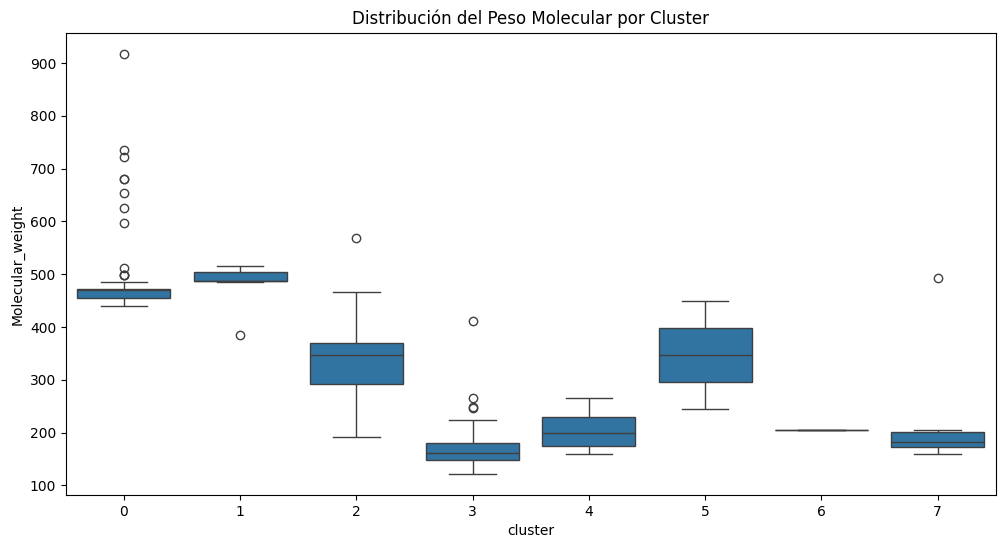

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Por ejemplo, visualiza la distribución de 'Molecular_weight' por cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='Molecular_weight', data=df_features_filtered)
plt.title('Distribución del Peso Molecular por Cluster')
plt.show()


#Dimensiones necesarias con PCA

Para determinar dimensiones necesarias para preservar el 95% de varianza, se usa PCA.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_filled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Encontrar el número mínimo de componentes que preservan al menos el 95% de la varianza
k_95 = (cumulative_variance >= 0.95).argmax() + 1

print(f"Número de dimensiones requeridas para preservar el 95% de la varianza: {k_95}")

Número de dimensiones requeridas para preservar el 95% de la varianza: 15


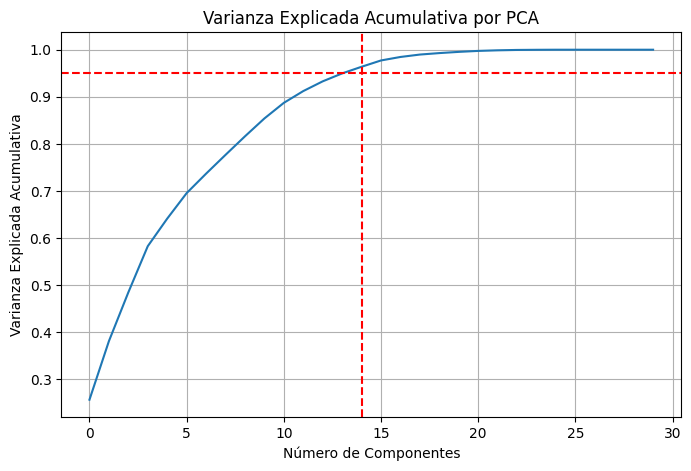

In [ ]:
# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance)
plt.title('Varianza Explicada Acumulativa por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=k_95 - 1, color='r', linestyle='--')
plt.grid(True)
plt.show()


Se procede a reducir los datos a 15 dimensiones con PCA.

In [ ]:
from sklearn.decomposition import PCA

# Inicializar PCA con 15 componentes
pca = PCA(n_components=15)
# Ajustar y transformar los datos escalados
data_reduced = pca.fit_transform(df_filled)

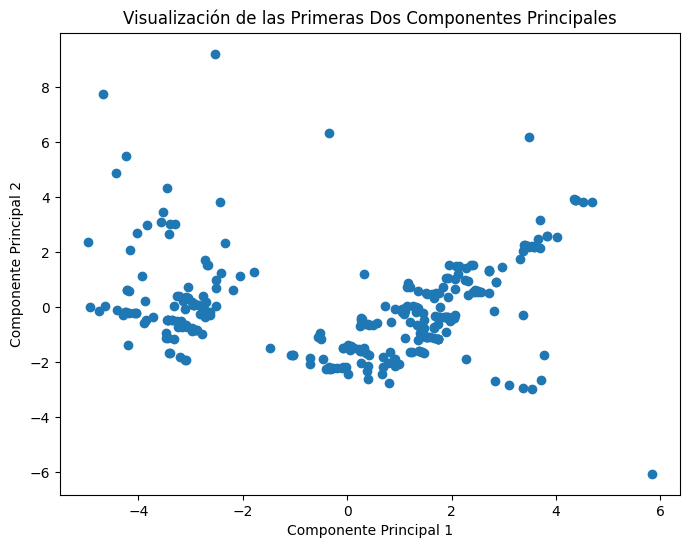

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de las Primeras Dos Componentes Principales')
plt.show()

Se verifica cuanta varianza se conserva con 15 componenetes principales

In [ ]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza explicada acumulativa:", pca.explained_variance_ratio_.cumsum())

Varianza explicada por cada componente: [0.25701019 0.12427557 0.10359289 0.09803534 0.05852627 0.05412787
 0.04131296 0.03991503 0.03930842 0.03797293 0.03311555 0.0250105
 0.02066472 0.01683027 0.01410476]
Varianza explicada acumulativa: [0.25701019 0.38128576 0.48487865 0.58291399 0.64144026 0.69556813
 0.73688109 0.77679613 0.81610455 0.85407748 0.88719303 0.91220353
 0.93286825 0.94969852 0.96380328]


Se observa que despues de la varianza explicada acumulativa, después de 15 componentes (0.96380328), se ha capturado y preservado aproximadamente el 96% de la varianza total, lo que significa que la mayor parte de la información esencial en los datos originales se mantiene incluso después de reducir significativamente el número de dimensiones.

#Para reducir dimensionalidad con K means

Una forma de usar KMeans para reducir la dimensionalidad es agrupar los datos en k clusters y luego usar los centroides de estos clusters como una representación reducida del conjunto de datos original.